In [1]:
%matplotlib nbagg
import jungfrau_utils as ju
import numpy as np
import json
import os, glob
import time
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import cm
from scipy.optimize import curve_fit
from IPython.display import clear_output, display
import matplotlib.colors as colors

import h5py
from ipyfilechooser import FileChooser

from alvra_tools import *
from alvra_tools.channels import *
#from alvra_tools.channels_raw import *
from scipy.stats.stats import pearsonr

### Choose a file from a scan or...

In [3]:
fc = FileChooser('/sf/alvra/data/p19161/raw/scan_info/')
fc.use_dir_icons = True
display(fc)

FileChooser(path='/sf/alvra/data/p19161/raw/scan_info', filename='', show_hidden='False')

In [55]:
from sfdata import SFScanInfo
scan = SFScanInfo(fc.selected)
Energy_eV = scan.readbacks

filenumber = 80
data = scan[filenumber]
print (data.fnames[0])
print (Energy_eV[filenumber])

/sf/alvra/data/p19161/raw/Na2S2O3_XAS_PIPS_InSb_003/run_010214.BSDATA.h5
2479.967203578271


### ... Choose a file not in a scan

In [9]:
#data = SFDataFiles('/sf/alvra/data/p18442/raw/RuFoil_3keV_mono/run_000163.*')
data = SFDataFiles('/sf/alvra/data/p18938/raw/check_izero_intensity/run_034524*')
print (data.fnames[0])

/sf/alvra/data/p18938/raw/check_izero_intensity/run_034524.BSDATA.h5


### PIPS diode and Izero

In [56]:
channel_list = [channel_PIPS_fluo, channel_Izero117, 
                channel_Izero117L, channel_Izero117D, 
                channel_Izero117R, channel_Izero117U]

########################################################################################################
data = scan[filenumber]
print (data)
results, _ = load_data_compact(channel_list, data)
data.close()

IzeroFEL = results[channel_Izero117]

IzeroFEL_L = results[channel_Izero117L]
IzeroFEL_D = results[channel_Izero117D]
IzeroFEL_R = results[channel_Izero117R]
IzeroFEL_U = results[channel_Izero117U]
DataFluo_shot = results[channel_PIPS_fluo]

SFDataFiles("/sf/alvra/data/p19161/raw/Na2S2O3_XAS_PIPS_InSb_003/run_010214.BSDATA.h5"): 82 channels

--------------------------------------------------------------------------------

SAR-CVME-TIFALL5:EvtSet              499 / 499 -> 0% loss ▇▇▇▇▇▇▇▇▇▇
SARES11-GES1:CH2_VAL_GET             499 / 499 -> 0% loss ▇▇▇▇▇▇▇▇▇▇
SAROP11-CVME-PBPS2:Lnk9Ch11-DATA-SUM 492 / 499 -> 1% loss ▇▇▇▇▇▇▇▇▇
SAROP11-CVME-PBPS2:Lnk9Ch13-DATA-SUM 492 / 499 -> 1% loss ▇▇▇▇▇▇▇▇▇
SAROP11-CVME-PBPS2:Lnk9Ch14-DATA-SUM 492 / 499 -> 1% loss ▇▇▇▇▇▇▇▇▇
SAROP11-CVME-PBPS2:Lnk9Ch15-DATA-SUM 492 / 499 -> 1% loss ▇▇▇▇▇▇▇▇▇
SAROP11-PBPS117:INTENSITY            492 / 499 -> 1% loss ▇▇▇▇▇▇▇▇▇

over the whole data set: 492 / 499 -> 1% loss
complete channels: 2 / 7 -> 71% incomplete

--------------------------------------------------------------------------------

FEL rep rate is 100.0 Hz


Energy = 2479.967203578271 eV
Median value Izero (all) = 0.6895930469923056
Median value fluo (all) = 4.281255677688954
correlation = 0.9836686059757884


<IPython.core.display.Javascript object>


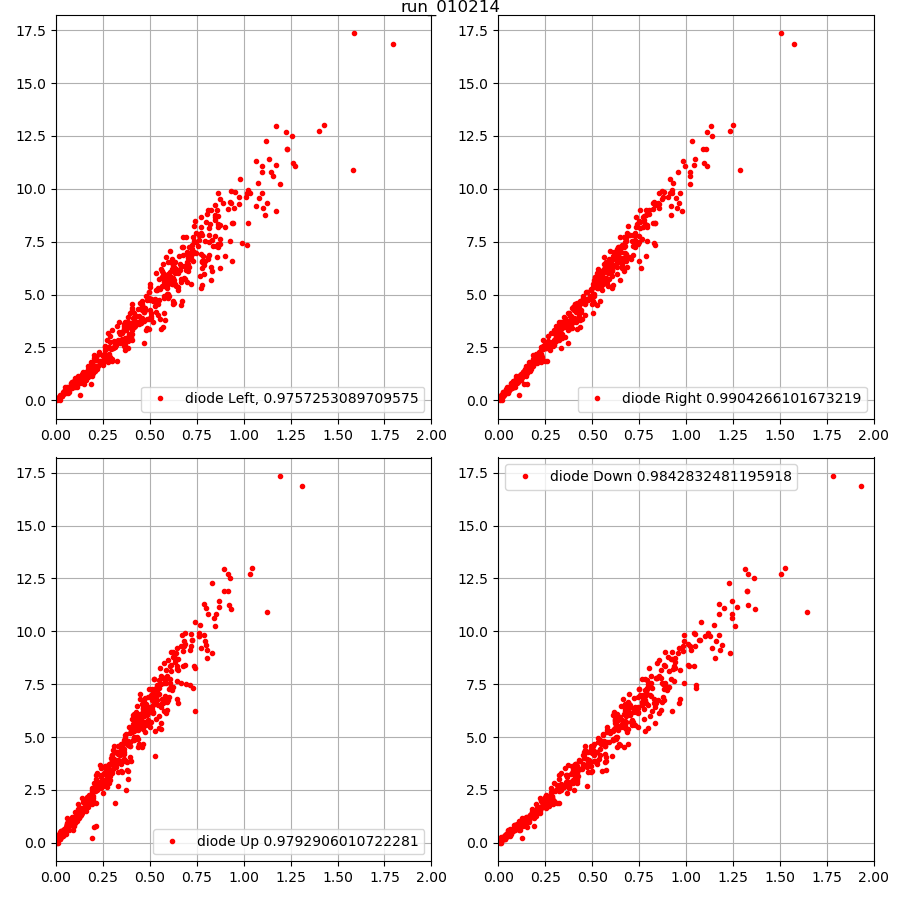

/sf/alvra/anaconda/alvra-analysis/lib/python3.6/site-packages/ipykernel_launcher.py:33: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 


In [57]:
print ("Energy = {} eV".format(Energy_eV[filenumber]))
print ("Median value Izero (all) = {}".format(np.median(IzeroFEL)))
print ("Median value fluo (all) = {}".format(np.median(DataFluo_shot)))
print ("correlation = {}".format(pearsonr(IzeroFEL,DataFluo_shot)[0]))

fig = plt.figure(constrained_layout=True, figsize=(9,9))
plt.suptitle(data.fnames[0].split('/')[-1].split('.')[0], y = 1)

plt.subplot(221)
plt.plot(IzeroFEL_L, DataFluo_shot, color = 'red',  linestyle='None', label='diode Left, {}'.format(pearsonr(IzeroFEL_L,DataFluo_shot)[0]),marker='.')
plt.grid()
plt.xlim(0,2)
plt.legend(loc="best")

plt.subplot(222)
plt.plot(IzeroFEL_R, DataFluo_shot, color = 'red',  linestyle='None', label='diode Right {}'.format(pearsonr(IzeroFEL_R,DataFluo_shot)[0]),marker='.')
plt.grid()
plt.xlim(0,2)
plt.legend(loc="best")

plt.subplot(223)
plt.plot(IzeroFEL_U, DataFluo_shot, color = 'red',  linestyle='None', label='diode Up {}'.format(pearsonr(IzeroFEL_U,DataFluo_shot)[0]),marker='.')
plt.grid()
plt.xlim(0,2)
plt.legend(loc="best")

plt.subplot(224)
plt.plot(IzeroFEL_D, DataFluo_shot, color = 'red',  linestyle='None', label='diode Down {}'.format(format(pearsonr(IzeroFEL_D,DataFluo_shot)[0])),marker='.')
plt.grid()
plt.xlim(0,2)
plt.legend(loc="best")

plt.tight_layout()


Energy = 2479.952989589648 eV
Median value Izero (all) = 0.832717941473377
Median value fluo (all) = 4.1593173714571225
correlation = 0.9773723467170865


<IPython.core.display.Javascript object>


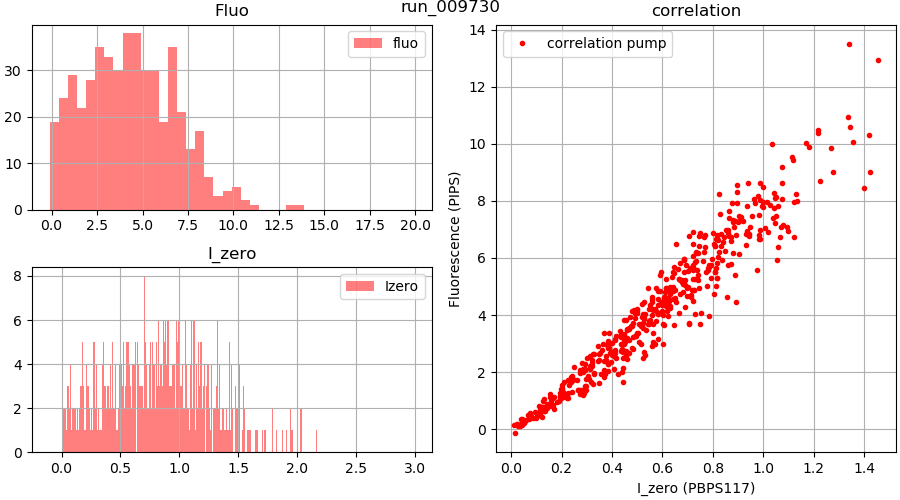

In [42]:
print ("Energy = {} eV".format(Energy_eV[filenumber]))
print ("Median value Izero (all) = {}".format(np.median(IzeroFEL)))
print ("Median value fluo (all) = {}".format(np.median(DataFluo_shot)))
print ("correlation = {}".format(pearsonr(IzeroFEL,DataFluo_shot)[0]))

fig = plt.figure(constrained_layout=True, figsize=(9,5))
plt.suptitle(data.fnames[0].split('/')[-1].split('.')[0], y = 1)
gs = fig.add_gridspec(2, 2)

f_ax1 = fig.add_subplot(gs[0, :-1])
f_ax1.set_title('Fluo')
plt.hist(DataFluo_shot, bins =np.arange(-0.1,20,0.5), facecolor='red', label="fluo", alpha=0.5)
plt.grid()
plt.legend(loc="best")

f_ax2 = fig.add_subplot(gs[1, :-1])
f_ax2.set_title('I_zero')
plt.hist(IzeroFEL, bins =np.arange(-0.1,3,0.01), facecolor='red', label='Izero', alpha=0.5)
plt.grid()
plt.legend(loc="best")

f_ax3 = fig.add_subplot(gs[0:, 1])
f_ax3.set_title('correlation')
plt.plot(IzeroFEL_L, DataFluo_shot, color = 'red',  linestyle='None', label='correlation pump',marker='.')
plt.grid()
plt.legend(loc="best")
plt.xlabel("I_zero (PBPS117)")
plt.ylabel ("Fluorescence (PIPS)")

plt.show()

In [36]:
channel_list_pp = [channel_Events, channel_PIPS_fluo, channel_Izero117L]
channel_list_all = channel_list_pp + [channel_energy]

########################################################################################################
data = scan[filenumber]
print (data)
resultsPP, results, _, _= load_data_compact_laser_pump(channel_list_pp, channel_list_all, data)
data.close()

IzeroFEL_pump_shot = resultsPP[channel_Izero117L].pump
IzeroFEL_unpump_shot = resultsPP[channel_Izero117L].unpump
DataFluo_pump_shot = resultsPP[channel_PIPS_fluo].pump
DataFluo_unpump_shot = resultsPP[channel_PIPS_fluo].unpump

SFDataFiles("/sf/alvra/data/p19161/raw/Na2S2O3_XAS_PIPS_002/run_009730.BSDATA.h5"): 82 channels

--------------------------------------------------------------------------------

SAR-CVME-TIFALL5:EvtSet              501 / 501 -> 0% loss ▇▇▇▇▇▇▇▇▇▇
SARES11-GES1:CH2_VAL_GET             501 / 501 -> 0% loss ▇▇▇▇▇▇▇▇▇▇
SAROP11-CVME-PBPS2:Lnk9Ch15-DATA-SUM 486 / 501 -> 3% loss ▇▇▇▇▇▇▇▇▇
SLAAR11-LTIM01-EVR0:DUMMY_PV4_NBS    501 / 501 -> 0% loss ▇▇▇▇▇▇▇▇▇▇

over the whole data set: 486 / 501 -> 3% loss
complete channels: 3 / 4 -> 25% incomplete

--------------------------------------------------------------------------------

Probe rep rate (FEL) is 100.0 Hz
Pump scheme is 0:1
Loaded 486 pump and 0 unpump shots


Energy = 2479.952989589648 eV
Median value Izero (all) = 0.582637220621109
Median value fluo (all) = 4.1593173714571225
correlation = 0.9640992767886828


<IPython.core.display.Javascript object>


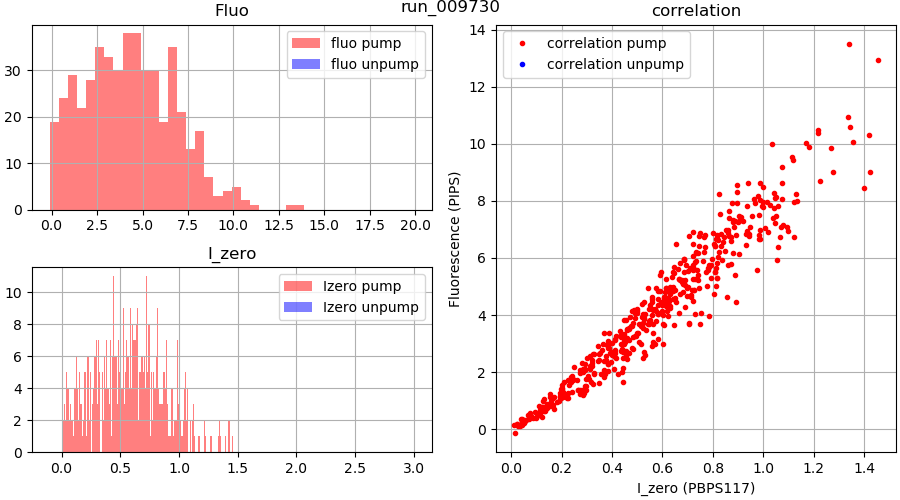

In [37]:
print ("Energy = {} eV".format(Energy_eV[filenumber]))
print ("Median value Izero (all) = {}".format(np.median(IzeroFEL_pump_shot)))
print ("Median value fluo (all) = {}".format(np.median(DataFluo_pump_shot)))
print ("correlation = {}".format(pearsonr(IzeroFEL_pump_shot,DataFluo_pump_shot)[0]))

fig = plt.figure(constrained_layout=True, figsize=(9,5))
plt.suptitle(data.fnames[0].split('/')[-1].split('.')[0], y = 1)
gs = fig.add_gridspec(2, 2)

f_ax1 = fig.add_subplot(gs[0, :-1])
f_ax1.set_title('Fluo')
plt.hist(DataFluo_pump_shot, bins =np.arange(-0.1,20,0.5), facecolor='red', label="fluo pump", alpha=0.5)
plt.hist(DataFluo_unpump_shot, bins =np.arange(-0.1,20,0.5), facecolor='blue', label="fluo unpump", alpha=0.5)
plt.grid()
plt.legend(loc="best")

f_ax2 = fig.add_subplot(gs[1, :-1])
f_ax2.set_title('I_zero')
plt.hist(IzeroFEL_pump_shot, bins =np.arange(-0.1,3,0.01), facecolor='red', label='Izero pump', alpha=0.5)
plt.hist(IzeroFEL_unpump_shot, bins =np.arange(-0.1,3,0.005), facecolor='blue', label='Izero unpump', alpha=0.5)

plt.grid()
plt.legend(loc="best")

f_ax3 = fig.add_subplot(gs[0:, 1])
f_ax3.set_title('correlation')
plt.plot(IzeroFEL_pump_shot, DataFluo_pump_shot, color = 'red',  linestyle='None', label='correlation pump',marker='.')
plt.plot(IzeroFEL_unpump_shot, DataFluo_unpump_shot, color = 'blue',  linestyle='None', label='correlation unpump',marker='.')
plt.grid()
plt.legend(loc="best")
plt.xlabel("I_zero (PBPS117)")
plt.ylabel ("Fluorescence (PIPS)")

plt.show()

## JF and Izero

In [31]:
channel_list = [channel_Izero117, channel_Izero122, channel_energy, 'JF04T01V01','JF10T01V01']

########################################################################################################

print (data)
results = load_data_compact(channel_list, data)
data.close()

Energy_shot   = results[channel_energy]
IzeroFEL117_shot = results[channel_Izero117]
IzeroFEL122_shot = results[channel_Izero122]
DataFluoJFimage_shot = results ['JF04T01V01']

SFDataFiles("/sf/alvra/data/p18741/raw/Co_YIG_monoscan_Fe_001/run_001705.BSDATA.h5", "/sf/alvra/data/p18741/raw/Co_YIG_monoscan_Fe_001/run_001705.BSREAD.h5", "/sf/alvra/data/p18741/raw/Co_YIG_monoscan_Fe_001/run_001705.JF04T01V01.h5", "/sf/alvra/data/p18741/raw/Co_YIG_monoscan_Fe_001/run_001705.JF10T01V01.h5"): 82 channels

--------------------------------------------------------------------------------

JF04T01V01                        2000 / 2000 -> 0% loss ▇▇▇▇▇▇▇▇▇▇
JF10T01V01                        2000 / 2000 -> 0% loss ▇▇▇▇▇▇▇▇▇▇
SAR-CVME-TIFALL5:EvtSet           2000 / 2000 -> 0% loss ▇▇▇▇▇▇▇▇▇▇
SAROP11-PBPS117:INTENSITY         1932 / 2000 -> 3% loss ▇▇▇▇▇▇▇▇▇
SAROP11-PBPS122:INTENSITY         2000 / 2000 -> 0% loss ▇▇▇▇▇▇▇▇▇▇
SLAAR11-LTIM01-EVR0:DUMMY_PV4_NBS 2000 / 2000 -> 0% loss ▇▇▇▇▇▇▇▇▇▇

over the whole data set: 1932 / 2000 -> 3% loss
complete channels: 5 / 6 -> 17% incomplete

--------------------------------------------------------------------------------

FEL rep ra

Energy = 7127.022226110858 eV
Median value Izero (all) = 0.3117787428200245
Median value fluo (all) = 1.0422046184539795
correlation = 0.9957028746199222


<IPython.core.display.Javascript object>


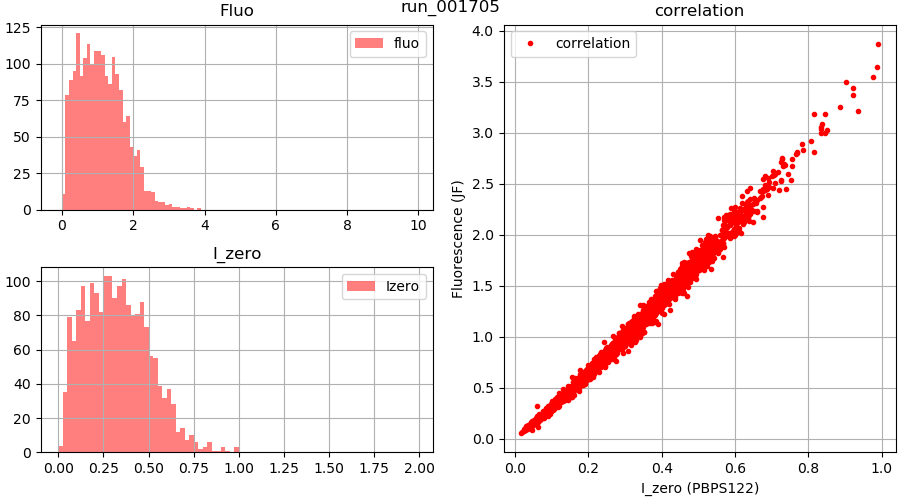

In [44]:
threshold_low = 5.5
threshold_high = 10

pid_roll = 0

nframes = DataFluoJFimage_shot.shape[0]
DataFluoJFimage_shot_thr = DataFluoJFimage_shot.copy()

for j in range(nframes):
    image = DataFluoJFimage_shot[j,:]
    image_thr = DataFluoJFimage_shot[j,:].copy()
    image_thr[image < threshold_low] = 0
    #image_thr[image > threshold_high] = 0
    DataFluoJFimage_shot_thr[j,:] = image_thr.copy()

IzeroFEL_shot = IzeroFEL122_shot.copy()

DataFluoJF_shot = np.roll(DataFluoJFimage_shot_thr.mean(axis = 1).mean(axis = 1), pid_roll, axis = 0)
DataFluoJF_shot_raw = DataFluoJF_shot.copy()

print ("Energy = {} eV".format(np.median(Energy_shot)))
print ("Median value Izero (all) = {}".format(np.median(IzeroFEL_shot)))
print ("Median value fluo (all) = {}".format(np.median(DataFluoJF_shot_raw)))
print ("correlation = {}".format(pearsonr(IzeroFEL_shot,DataFluoJF_shot)[0]))

fig = plt.figure(constrained_layout=True, figsize=(9,5))
plt.suptitle(data.fnames[0].split('/')[-1].split('.')[0], y = 1)
gs = fig.add_gridspec(2, 2)

f_ax1 = fig.add_subplot(gs[0, :-1])
f_ax1.set_title('Fluo')
plt.hist(DataFluoJF_shot, bins =np.arange(-0.1,10,0.1), facecolor='red', label="fluo", alpha=0.5)
plt.grid()
plt.legend(loc="best")

f_ax2 = fig.add_subplot(gs[1, :-1])
f_ax2.set_title('I_zero')
plt.hist(IzeroFEL_shot, bins =np.arange(0,2,0.025), facecolor='red', label='Izero', alpha=0.5)
plt.grid()
plt.legend(loc="best")

f_ax3 = fig.add_subplot(gs[0:, 1])
f_ax3.set_title('correlation')
plt.plot(IzeroFEL_shot, DataFluoJF_shot, color = 'red',  linestyle='None', label='correlation',marker='.')
plt.grid()
plt.legend(loc="best")
plt.xlabel("I_zero (PBPS122)")
plt.ylabel ("Fluorescence (JF)")

plt.show()

## JF with itself

0


<IPython.core.display.Javascript object>


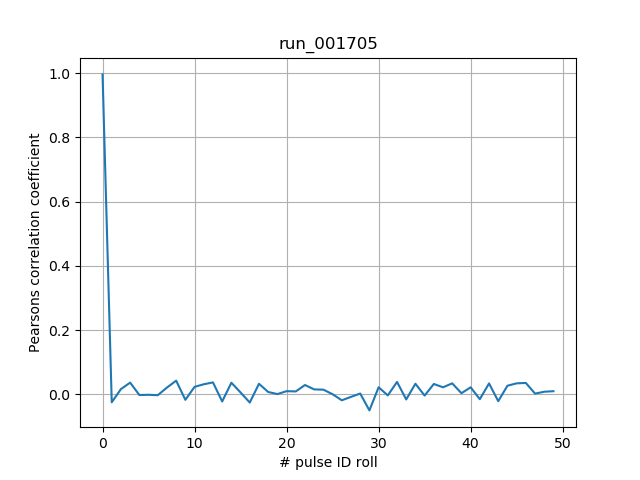

In [43]:
from scipy.stats.stats import pearsonr

DataFluoJF_shot_rot = np.copy(DataFluoJF_shot)
corr = []

for i in range (50):
    DataFluoJF_shot_rot = np.roll(DataFluoJF_shot, i, axis = 0)
    corr.append(pearsonr(IzeroFEL_shot,DataFluoJF_shot_rot)[0])
corr = np.asarray(corr)
print (np.argmax(corr))

plt.figure()
plt.title(data.fnames[0].split('/')[-1].split('.')[0])
plt.plot(corr)
plt.ylabel('Pearsons correlation coefficient')
plt.xlabel('# pulse ID roll')
plt.grid()
plt.show()

## Izero vs Izero

Energy = 7127.022226110858 eV
Median value Izero 117 (all) = 1.034642018377781
Median value Izero 122 (all) = 0.3117787428200245
correlation = 0.997936014780009


<IPython.core.display.Javascript object>


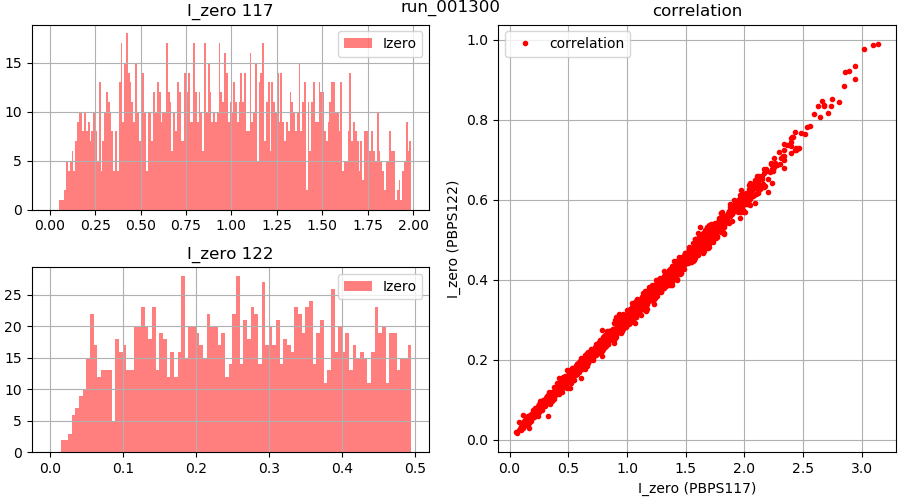

In [48]:
IzeroFEL_shot1 = IzeroFEL117_shot.copy()
IzeroFEL_shot2 = IzeroFEL122_shot.copy()

print ("Energy = {} eV".format(np.median(Energy_shot)))
print ("Median value Izero 117 (all) = {}".format(np.median(IzeroFEL_shot1)))
print ("Median value Izero 122 (all) = {}".format(np.median(IzeroFEL_shot2)))
print ("correlation = {}".format(pearsonr(IzeroFEL_shot1,IzeroFEL_shot2)[0]))

fig = plt.figure(constrained_layout=True, figsize=(9,5))
plt.suptitle(data.fnames[0].split('/')[-1].split('.')[0], y = 1)
gs = fig.add_gridspec(2, 2)

f_ax1 = fig.add_subplot(gs[0, :-1])
f_ax1.set_title('I_zero 117')
plt.hist(IzeroFEL_shot1, bins =np.arange(0,2,0.01), facecolor='red', label="Izero", alpha=0.5)
plt.grid()
plt.legend(loc="best")

f_ax2 = fig.add_subplot(gs[1, :-1])
f_ax2.set_title('I_zero 122')
plt.hist(IzeroFEL_shot2, bins =np.arange(0,0.5,0.005), facecolor='red', label='Izero', alpha=0.5)
plt.grid()
plt.legend(loc="best")

f_ax3 = fig.add_subplot(gs[0:, 1])
f_ax3.set_title('correlation')
plt.plot(IzeroFEL_shot1, IzeroFEL_shot2, color = 'red',  linestyle='None', label='correlation',marker='.')
plt.grid()
plt.legend(loc="best")
plt.xlabel("I_zero (PBPS117)")
plt.ylabel ("I_zero (PBPS122)")

plt.show()

In [5]:
scan_name ="Co_YIG_monoscan_008"
DIR_json = "/sf/alvra/data/p18741/raw/scan_info/"
DIR = "/sf/alvra/data/p18741/raw/" + scan_name + "/"             #use this for a scan

#######################################################################

!ls -lah -rt $DIR | grep h5
!hostname

-rw-r--r--.  1 root p18741 4.9G Dec  9 00:08 run_000890.JF04T01V01.h5
-rw-r--r--.  1 root p18741 4.9G Dec  9 00:08 run_000890.JF10T01V01.h5
-rw-r--r--.  1 root p18741 4.9G Dec  9 00:09 run_000891.JF10T01V01.h5
-rw-r--r--.  1 root p18741 4.9G Dec  9 00:09 run_000891.JF04T01V01.h5
-rw-r--r--.  1 root p18741 603M Dec  9 00:10 run_000890.BSREAD.h5
-rw-r--r--.  1 root p18741 4.9G Dec  9 00:10 run_000892.JF04T01V01.h5
-rw-r--r--.  1 root p18741 4.9G Dec  9 00:10 run_000892.JF10T01V01.h5
-rw-r--r--.  1 root p18741  58M Dec  9 00:11 run_000890.BSDATA.h5
-rw-r--r--.  1 root p18741 603M Dec  9 00:11 run_000891.BSREAD.h5
-rw-r--r--.  1 root p18741  22M Dec  9 00:11 run_000891.BSDATA.h5
-rw-r--r--.  1 root p18741 4.9G Dec  9 00:11 run_000893.JF10T01V01.h5
-rw-r--r--.  1 root p18741 4.9G Dec  9 00:11 run_000893.JF04T01V01.h5
-rw-r--r--.  1 root p18741 4.9G Dec  9 00:12 run_000894.JF04T01V01.h5
-rw-r--r--.  1 root p18741 4.9G Dec  9 00:12 run_000894.JF10T01V01.h5
-rw-r--r--.  1 root p18741 603M Dec 

ra-c-004.psi.ch


In [10]:
f ="run_000893*.h5"
fn = DIR + f

channel_list_pp = [channel_Events, channel_Izero117, channel_Izero122,'JF04T01V01','JF10T01V01']
channel_list_all = channel_list_pp + [channel_energy]

resultsPP, results, _, _ = load_data_compact_laser_pump(channel_list_pp, channel_list_all, fn)

Energy_shot   = results[channel_energy]

IzeroFEL117_pump_shot = resultsPP[channel_Izero122].pump
IzeroFEL117_unpump_shot = resultsPP[channel_Izero122].unpump
DataFluoJFimage_pump_shot = resultsPP ['JF04T01V01']
DataFluoJFimage_unpump_shot = resultsPP ['JF04T01V01']

Auto-located gain file: /sf/alvra/config/jungfrau/gainMaps/JF04T01V01/gains.h5
Auto-located pedestal file: /sf/alvra/data/p18741/raw/JF_pedestals/run_000886.JF04T01V01.res.h5
jungfrau file: 00:11 09.12.2020
pedestal file: 22:55 08.12.2020
    mtime difference: 1:16:11.631875
Auto-located gain file: /sf/alvra/config/jungfrau/gainMaps/JF10T01V01/gains.h5
Auto-located pedestal file: /sf/alvra/data/p18741/raw/JF_pedestals/run_000886.JF10T01V01.res.h5
jungfrau file: 00:11 09.12.2020
pedestal file: 22:55 08.12.2020
    mtime difference: 1:16:06.969933
Auto-located gain file: /sf/alvra/config/jungfrau/gainMaps/JF04T01V01/gains.h5
Auto-located pedestal file: /sf/alvra/data/p18741/raw/JF_pedestals/run_000886.JF04T01V01.res.h5
jungfrau file: 00:11 09.12.2020
pedestal file: 22:55 08.12.2020
    mtime difference: 1:16:11.631875
Auto-located gain file: /sf/alvra/config/jungfrau/gainMaps/JF10T01V01/gains.h5
Auto-located pedestal file: /sf/alvra/data/p18741/raw/JF_pedestals/run_000886.JF10T01V01.res.

## Pump probe JF and Izero

In [8]:
threshold_low = 5
threshold_high = 10

pid_roll = 0

nframes = DataFluoJFimage_pump_shot.shape[0]
DataFluoJFimage_pump_shot_thr = DataFluoJFimage_pump_shot.copy()
DataFluoJFimage_unpump_shot_thr = DataFluoJFimage_unpump_shot.copy()

for j in range(nframes):
    image_pump = DataFluoJFimage_pump_shot[j,:]
    image_unpump = DataFluoJFimage_unpump_shot[j,:]
    
    image_pump_thr = DataFluoJFimage_pump_shot[j,:].copy()
    image_unpump_thr = DataFluoJFimage_unpump_shot[j,:].copy()
    
    image_pump_thr[image_pump < threshold_low] = 0
    image_unpump_thr[image_unpump < threshold_low] = 0
    
    #image_pump_thr[image_pump > threshold_high] = 0
    #image_unpump_thr[image_unpump > threshold_high] = 0
    
    DataFluoJFimage_pump_shot_thr[j,:] = image_pump_thr.copy()
    DataFluoJFimage_unpump_shot_thr[j,:] = image_unpump_thr.copy()
    

IzeroFEL_pump_raw = IzeroFEL117_pump_shot.copy()

DataFluo_pump_shot = np.roll(DataFluoJFimage_pump_shot_thr.mean(axis = 1).mean(axis = 1), pid_roll, axis = 0)
DataFluo_unpump_shot = np.roll(DataFluoJFimage_unpump_shot_thr.mean(axis = 1).mean(axis = 1), pid_roll, axis = 0)
DataFluoJF_shot_raw = DataFluoJF_shot.copy()
DataFluo_unpump_shot_raw = DataFluo_unpump_shot.copy()

print ("Energy = {} eV".format(np.median(Energy_shot)))
print ("Median value Izero (all) = {}".format(np.median(np.concatenate((IzeroFEL_pump_raw, IzeroFEL_unpump_raw), axis=0))))
print ("Median value fluo (all) = {}".format(np.median(np.concatenate((DataFluo_pump_shot_raw, DataFluo_unpump_shot_raw), axis=0))))

fig = plt.figure(constrained_layout=True, figsize=(9,5))
plt.suptitle(scan_name +"/"+ f.split('.')[0], y = 1)
gs = fig.add_gridspec(2, 2)

f_ax1 = fig.add_subplot(gs[0, :-1])
f_ax1.set_title('Fluo')
plt.hist(DataFluo_pump_shot, bins =np.arange(-0.5,0.85,0.01), facecolor='red', label="pump", alpha=0.5)
plt.hist(DataFluo_unpump_shot, bins =np.arange(-0.5,0.85,0.01), facecolor='grey', label="unpump", alpha=0.5)
plt.grid()
plt.legend(loc="best")

f_ax2 = fig.add_subplot(gs[1, :-1])
f_ax2.set_title('I_zero')
plt.hist(IzeroFEL_pump_shot, bins =np.arange(0,0.85,0.01), facecolor='red', label='pump', alpha=0.5)
plt.hist(IzeroFEL_unpump_shot, bins =np.arange(0,0.85,0.01), facecolor='blue', label ='unpump', alpha=0.5)
plt.grid()
plt.legend(loc="best")

f_ax3 = fig.add_subplot(gs[0:, 1])
f_ax3.set_title('correlation')
plt.plot(IzeroFEL_pump_shot, DataFluo_pump_shot, color = 'red',  linestyle='None', label='pump',marker='.')
plt.plot(IzeroFEL_unpump_shot, DataFluo_unpump_shot, color = 'blue',  linestyle='None', label='unpump',marker='.')
plt.grid()
plt.legend(loc="best")
plt.xlabel("I_zero (PBPS122)")
plt.ylabel ("Fluorescence (PIPS)")

plt.show()

AttributeError: 'PPData' object has no attribute 'shape'